<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost for Kaggle

### Initializations

In [19]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Load Data

In [4]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [5]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [6]:
df = pd.get_dummies(dff.drop([ 'department', 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,workAccident_0,workAccident_1,gotPromotion_0,gotPromotion_1,salary_high,salary_low,salary_medium,hasLeftCompany
0,0.65,0.96,5,226,2,0,1,1,0,0,0,1,0
1,0.88,0.80,3,166,2,1,0,1,0,0,1,0,0
2,0.69,0.98,3,214,2,1,0,1,0,0,1,0,0
3,0.41,0.47,2,154,3,1,0,1,0,0,1,0,1
4,0.87,0.76,5,254,2,0,1,1,0,0,1,0,0


In [7]:
y_train = df['hasLeftCompany'].values
y_train

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [8]:
X_train = df.drop(['hasLeftCompany'], axis=1).values
X_train

array([[ 0.65,  0.96,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.88,  0.8 ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.69,  0.98,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ..., 
       [ 0.83,  0.86,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.74,  0.56,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ]])

In [9]:
scaler = MinMaxScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
dfy = pd.read_pickle('exchange/hr_01_cleaned_test.pkl')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
id                      4999 non-null int64
satisfactionLevel       4999 non-null float64
yearsSinceEvaluation    4999 non-null float64
numberOfProjects        4999 non-null int64
averageMonthlyHours     4999 non-null int64
yearsAtCompany          4999 non-null int64
workAccident            4999 non-null category
gotPromotion            4999 non-null category
department              4999 non-null category
salary                  4999 non-null category
dtypes: category(4), float64(2), int64(4)
memory usage: 254.1 KB


In [12]:
# Datentyp von Category in Object umwandeln
for col in dfy.select_dtypes(['category']):
    print('transforming', col)
    dfy[col] = dfy[col].astype('str')

transforming workAccident
transforming gotPromotion
transforming department
transforming salary


In [13]:
df = pd.get_dummies(dfy.drop(['department', 'id'], axis=1)).join(dfy[['id']])
df.head()

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,workAccident_0,workAccident_1,gotPromotion_0,gotPromotion_1,salary_high,salary_low,salary_medium,id
0,0.81,0.96,4,219,2,1,0,1,0,0,1,0,10000
1,0.86,0.84,4,246,6,1,0,1,0,0,1,0,10001
2,0.90,0.66,4,242,3,1,0,1,0,1,0,0,10002
3,0.37,0.54,2,131,3,0,1,1,0,0,0,1,10003
4,0.52,0.96,3,271,3,0,1,1,0,0,0,1,10004


In [14]:
ids = df['id']
ids.head()

0    10000
1    10001
2    10002
3    10003
4    10004
Name: id, dtype: int64

In [15]:
X_test = df.drop(['id'], axis=1).values
X_test

array([[ 0.81,  0.96,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.86,  0.84,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.9 ,  0.66,  4.  , ...,  1.  ,  0.  ,  0.  ],
       ..., 
       [ 0.66,  0.73,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.79,  1.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.98,  0.86,  2.  , ...,  0.  ,  1.  ,  0.  ]])

In [16]:
X_test_scaled = scaler.transform(X_test)

### Tune Parameters Step by Step

Im Gegensatz zum letzten Versuch sollte diesmal ein schrittweises Hyperparameter Tuning per Cross Validation auf dem gesamten Trainingsdatenset durchgeführt werden.

#### Tuning tree-specific parameters

Zunächst wurde eine die Learning Rate so gewählt, dass die dazu passende beste Anzahl an Estimators unter 100 liegt, um im folgenden eine akzeptable Rechenzeit bei den GridSearchCV Optimierungen zu gewährleisten.

In [55]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_test1 = {'n_estimators':range(20,81,5)}
clf = GradientBoostingClassifier(learning_rate=0.4, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
gsearch1 = GridSearchCV(estimator=clf,param_grid=param_test1,n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(20, 81, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.97520, std: 0.00220, params: {'n_estimators': 20},
  mean: 0.97600, std: 0.00200, params: {'n_estimators': 25},
  mean: 0.97550, std: 0.00277, params: {'n_estimators': 30},
  mean: 0.97660, std: 0.00213, params: {'n_estimators': 35},
  mean: 0.97730, std: 0.00232, params: {'n_estimators': 40},
  mean: 0.97810, std: 0.00260, params: {'n_estimators': 45},
  mean: 0.97870, std: 0.00191, params: {'n_estimators': 50},
  mean: 0.97890, std: 0.00146, params: {'n_estimators': 55},
  mean: 0.97980, std: 0.00136, params: {'n_estimators': 60},
  mean: 0.97940, std: 0.00162, params: {'n_estimators': 65},
  mean: 0.97980, std: 0.00112, params: {'n_estimators': 70},
  mean: 0.97890, std: 0.00086, params: {'n_estimators': 75},
  mean: 0.97920, std: 0.00240, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.9798)

Um ein Overfitting zu vermeiden wurden als nächstes die Parameter `max_depth` und `min_samples_split` getestet. Damit wird die maximale Tiefe der Bäume sowie die minimale Anzahl an Samples eines Knoten für einen Split festgelegt.

In [87]:
param_test2 = {'max_depth':range(8,12,1), 'min_samples_split':range(300,401,10)}
clf=GradientBoostingClassifier(learning_rate=0.4, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10)
gsearch2 = GridSearchCV(estimator=clf, 
param_grid = param_test2,n_jobs=-1,iid=False, cv=10)
gsearch2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(8, 12), 'min_samples_split': range(300, 401, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98240, std: 0.00350, params: {'max_depth': 8, 'min_samples_split': 300},
  mean: 0.98300, std: 0.00331, params: {'max_depth': 8, 'min_samples_split': 310},
  mean: 0.98190, std: 0.00386, params: {'max_depth': 8, 'min_samples_split': 320},
  mean: 0.98220, std: 0.00411, params: {'max_depth': 8, 'min_samples_split': 330},
  mean: 0.98220, std: 0.00325, params: {'max_depth': 8, 'min_samples_split': 340},
  mean: 0.98360, std: 0.00380, params: {'max_depth': 8, 'min_samples_split': 350},
  mean: 0.98290, std: 0.00342, params: {'max_depth': 8, 'min_samples_split': 360},
  mean: 0.98130, std: 0.00290, params: {'max_depth': 8, 'min_samples_split': 370},
  mean: 0.98180, std: 0.00366, params: {'max_depth': 8, 'min_samples_split': 380},
  mean: 0.98230, std: 0.00387, params: {'max_depth': 8, 'min_samples_split': 390},
  mean: 0.98080, std: 0.00404, params: {'max_depth': 8, 'min_samples_split': 400},
  mean: 0.98210, std: 0.00451, params: {'max_depth': 9, 'min_samples_split': 300},
  me

Eine weitere Verbesserung konnte durch Tunen des baumspezifisches `min_samples_leaf` erzielt werden, mit dem festgelegt wird wie viele Samples sich mindestens in einem Leaf Node befinden müssen.

In [105]:
param_test3 = {'min_samples_split':range(200,361,20), 'min_samples_leaf':range(1,5,1)}
clf=GradientBoostingClassifier(learning_rate=0.4, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10, max_depth=11)
gsearch3 = GridSearchCV(estimator=clf, param_grid = param_test3, n_jobs=-1,iid=False, cv=10)
gsearch3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=11,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_split': range(200, 361, 20), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98560, std: 0.00355, params: {'min_samples_leaf': 1, 'min_samples_split': 200},
  mean: 0.98570, std: 0.00260, params: {'min_samples_leaf': 1, 'min_samples_split': 220},
  mean: 0.98680, std: 0.00300, params: {'min_samples_leaf': 1, 'min_samples_split': 240},
  mean: 0.98500, std: 0.00214, params: {'min_samples_leaf': 1, 'min_samples_split': 260},
  mean: 0.98570, std: 0.00248, params: {'min_samples_leaf': 1, 'min_samples_split': 280},
  mean: 0.98370, std: 0.00337, params: {'min_samples_leaf': 1, 'min_samples_split': 300},
  mean: 0.98370, std: 0.00328, params: {'min_samples_leaf': 1, 'min_samples_split': 320},
  mean: 0.98520, std: 0.00252, params: {'min_samples_leaf': 1, 'min_samples_split': 340},
  mean: 0.98570, std: 0.00257, params: {'min_samples_leaf': 1, 'min_samples_split': 360},
  mean: 0.98570, std: 0.00300, params: {'min_samples_leaf': 2, 'min_samples_split': 200},
  mean: 0.98550, std: 0.00335, params: {'min_samples_leaf': 2, 'min_samples_split': 220},
  mean: 0.

Der Parameter `max_features` legt fest, wie viele Features berücksichtigt werden sollen bei der Suche nach dem besten Split. Um welche Features es sich genau handelt, wird dann per Zufall bestimmt. 

In [111]:
param_test4 = {'max_features':range(1,13,1)}
clf=GradientBoostingClassifier(learning_rate=0.4, n_estimators=60,max_depth=11, min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10)
gsearch4 = GridSearchCV(estimator=clf, param_grid = param_test4,n_jobs=-1,iid=False, cv=10)
gsearch4.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=240,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(1, 13)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [116]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98370, std: 0.00220, params: {'max_features': 1},
  mean: 0.98340, std: 0.00254, params: {'max_features': 2},
  mean: 0.98680, std: 0.00300, params: {'max_features': 3},
  mean: 0.98470, std: 0.00306, params: {'max_features': 4},
  mean: 0.98500, std: 0.00261, params: {'max_features': 5},
  mean: 0.98580, std: 0.00244, params: {'max_features': 6},
  mean: 0.98430, std: 0.00241, params: {'max_features': 7},
  mean: 0.98710, std: 0.00247, params: {'max_features': 8},
  mean: 0.98660, std: 0.00352, params: {'max_features': 9},
  mean: 0.98610, std: 0.00295, params: {'max_features': 10},
  mean: 0.98610, std: 0.00388, params: {'max_features': 11},
  mean: 0.98570, std: 0.00286, params: {'max_features': 12}],
 {'max_features': 8},
 0.98710008710008701)

Außerdem wurde der Anteil an Datenpunkten pro Baum bestimmt, der zufällig ausgwählt und berücksichtigt werden soll.

In [115]:
param_test5 = {'subsample':[0.7,0.75,0.775,0.8,0.825,0.85,0.9]}
clf=GradientBoostingClassifier(learning_rate=0.4, n_estimators=60,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)
gsearch5 = GridSearchCV(estimator=clf,param_grid = param_test5,n_jobs=-1,iid=False, cv=10)
gsearch5.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=240,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.75, 0.775, 0.8, 0.825, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98560, std: 0.00330, params: {'subsample': 0.7},
  mean: 0.98500, std: 0.00261, params: {'subsample': 0.75},
  mean: 0.98570, std: 0.00289, params: {'subsample': 0.775},
  mean: 0.98710, std: 0.00247, params: {'subsample': 0.8},
  mean: 0.98590, std: 0.00298, params: {'subsample': 0.825},
  mean: 0.98600, std: 0.00257, params: {'subsample': 0.85},
  mean: 0.98640, std: 0.00174, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.98710008710008701)

#### Tuning learning_rate and n_estimators

Nach der Bestimmung der baumspezifischen Parametern, um ein optimales Verhältnis von Over- und Underfitting zu erreichen, sollten als nächstes die Anzahl der `n_estimators` vergrößert und gleichzeit die `learning_rate` reduziert werden.

In [122]:
from sklearn.model_selection import GridSearchCV

In [135]:
clf = GradientBoostingClassifier(max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [166]:
param_space = {'n_estimators':[170,180,190], 'learning_rate':[0.075, 0.1, 0.125]}

In [167]:
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)

In [168]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=240,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [170, 180, 190], 'learning_rate': [0.075, 0.1, 0.125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


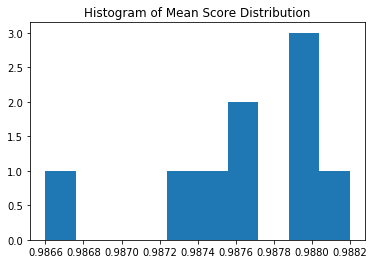

In [169]:
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [170]:
gs.best_score_

0.98819999999999997

In [171]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 180}

Nachdem ein erstes passendes Verhältnis bestimmt wurde, sollte als nächstes schrittweise die `learning_rate` halbiert und die `n_estimators` verdoppelt werden, bis ein optimales Ergebnis erzielt wird.

In [172]:
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=180,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [173]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98249948249948249

In [177]:
clf = GradientBoostingClassifier(learning_rate=0.05, n_estimators=360,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [178]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98329968329968342

In [179]:
clf = GradientBoostingClassifier(learning_rate=0.025, n_estimators=720,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [180]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98329988329988327

In [181]:
clf = GradientBoostingClassifier(learning_rate=0.0125, n_estimators=1440,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [182]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98349988349988349

In [183]:
clf = GradientBoostingClassifier(learning_rate=0.00625, n_estimators=2880,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [184]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.9832001832001831

Das Verfahren wurde so lange angewendet, bis im letzten Schritt erstmals der Cross Validation Score gesunken ist. Die vorletzten Konfiguration wurde somit als beste Hyperparameter gewählt für die Predictions.

### Predicting Kaggle Data

In [17]:
clf = GradientBoostingClassifier(learning_rate=0.0125, n_estimators=1440,max_depth=11,min_samples_split=240, min_samples_leaf=1, subsample=0.8, random_state=10,max_features=8)

In [22]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
scores.mean()

0.98810048810048823

In [23]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0125, loss='deviance', max_depth=11,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=240,
              min_weight_fraction_leaf=0.0, n_estimators=1440,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

In [24]:
predictions = clf.predict(X_test_scaled)
list(predictions);

In [25]:
list(ids);

In [190]:
df = pd.DataFrame(
    {'id': ids,
     'left': predictions
    })
df.head()

,id,left
0,10000,0
1,10001,1
2,10002,0
3,10003,1
4,10004,0


In [191]:
df.to_csv('kaggle/gradient_boost.csv', index=False)

**Ergebnis in Kaggle:** 98.865%